# Simple Decision Tree Classifier

In [31]:
import pandas as pd
import numpy as np
import os
import csv
from operator import itemgetter

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier

import nDCG
from kaggle_expedia_tools import ndcg_calc


In [67]:
import imp
nDCG = imp.reload(nDCG)

## Load dataset and choose features

In [4]:
# load dataset
df = pd.read_pickle('cleaned_dataset')

# add column with relevance scores
df['relevance'] = df['booking_bool'] + df['click_bool']

# change relevance column with relevance score (1 if clicked, 5 if booked)
df['relevance'] = df['relevance'].map({0:0, 1:1, 2:5})

# select features to train model with
selected_features1 = ['value_for_money','price_rank', 'star_diff_from_historic_mean','comp1_rate_percent_diff',\
                     'srch_query_affinity_score','srch_room_count','price_diff_from_historic_mean', \
                      'visitor_hist_adr_usd', 'site_id', 'prop_review_score', 'prop_location_score1']


selected_features = ['comp6_rate_percent_diff_signed', 'comp4_rate_percent_diff_signed',
       'comp8_rate_percent_diff_signed', 'comp7_rate_percent_diff_signed',
       'comp7_rate_percent_diff_log', 'comp3_rate_percent_diff_signed',
       'comp2_rate_percent_diff_signed', 'comp5_rate_percent_diff_signed',
       'star_diff_from_historic_mean', 'visitor_hist_adr_usd',
       'comp1_rate', 'comp6_rate_percent_diff',
       'comp1_rate_percent_diff_log', 'comp4_rate_percent_diff',
       'srch_query_affinity_score', 'comp7_rate_percent_diff',
       'comp1_rate_percent_diff', 'comp3_rate_percent_diff',
       'srch_room_count', 'comp2_rate_percent_diff',
       'comp8_rate_percent_diff', 'visitor_hist_starrating',
       'price_diff_from_historic_mean', 'comp1_rate_percent_diff_signed',
       'comp5_rate_percent_diff', 'srch_adults_count', 'prop_brand_bool',
       'prop_country_id', 'visitor_location_country_id',
       'comp1_rate_percent_diff_signed_norm', 'prop_starrating',
       'prop_review_score', 'srch_saturday_night_bool', 'site_id',
       'srch_length_of_stay', 'comp4_rate_percent_diff_signed_norm',
       'comp8_rate_percent_diff_signed_norm', 'prop_starrating_monot',
       'random_bool', 'comp3_rate_percent_diff_signed_norm']



In [5]:
selected_features = ['visitor_hist_adr_usd',
 'star_diff_from_historic_mean',
 'comp1_rate_percent_diff_log',
 'srch_query_affinity_score',
 'srch_room_count',
 'visitor_hist_starrating',
 'price_diff_from_historic_mean',
 'comp1_rate_percent_diff_signed',
 'comp7_rate_percent_diff_signed',
 'srch_adults_count',
 'prop_brand_bool',
 'prop_country_id',
 'visitor_location_country_id',
 'comp6_rate_percent_diff_signed',
 'prop_starrating',
 'prop_review_score',
 'srch_saturday_night_bool',
 'random_bool',
 'site_id',
 'srch_length_of_stay',
 'prop_starrating_monot',
 'srch_id',
 'orig_destination_distance',
 'promotion_flag',
 'price_rank',
 'star_rank',
 'srch_destination_id',
 'srch_children_count',
 'prop_location_score2_norm',
 'prop_location_score1_norm',
 'price_usd_norm_srch_id',
 'prop_location_score2',
 'prop_id',
 'prop_location_score_mean',
 'srch_booking_window',
 'value_for_money_norm_srch_id',
 'comp5_inv',
 'value_for_money',
 'comp_rate_percent_diff_mean',
 'prop_log_historical_price',
 'price_usd',
 'prop_location_score1',
 'comp2_inv',
 'comp2_rate_percent_diff_signed',
 'comp1_inv',
 'comp3_inv',
 'comp8_inv',
 'log_price_usd',
 'comp4_inv',
 'comp3_rate_percent_diff_signed',
 'comp7_inv',
 'price_usd_norm_prop_id',
 'comp4_rate_percent_diff_signed',
 'comp5_rate_percent_diff_signed',
 'comp6_inv',
 'month']


TO_DROP=[
 'comp1_rate','comp2_rate','comp3_rate','comp4_rate','comp5_rate',
 'comp6_rate','comp7_rate','comp8_rate',
 'comp6_rate_percent_diff',
 'comp4_rate_percent_diff',
 'comp7_rate_percent_diff',
 'comp1_rate_percent_diff',
 'comp3_rate_percent_diff',
 'comp2_rate_percent_diff',
 'comp8_rate_percent_diff',
 'comp5_rate_percent_diff',
 'comp1_rate_percent_diff_signed_norm',
 'comp2_rate_percent_diff_signed_norm',
 'comp4_rate_percent_diff_signed_norm',
 'comp8_rate_percent_diff_signed_norm',
 'comp3_rate_percent_diff_signed_norm',
 'comp5_rate_percent_diff_signed_norm',
 'comp6_rate_percent_diff_signed_norm',
 'comp7_rate_percent_diff_signed_norm',
 'prop_location_score1',
 'prop_location_score2']

selected_features = list(set(selected_features))
TO_DROP = list(set(TO_DROP))

for feat in list(TO_DROP):
    if feat in selected_features:
        selected_features.remove(feat)

In [6]:
features_to_keep = ['relevance', 'srch_id', 'prop_id', 'booking_bool']
all_possible_features = list(set(selected_features + features_to_keep))
df_select = df.loc[:,all_possible_features]

In [7]:

df = df_select
for feature in selected_features:
    df[feature] = df[feature].replace([np.inf, -np.inf], np.nan)
    df[feature][df[feature].isnull()] = df[feature].median()
df_select = df
df_select

/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,comp1_rate_percent_diff_log,visitor_hist_starrating,srch_query_affinity_score,visitor_hist_adr_usd,prop_log_historical_price,log_price_usd,prop_review_score,srch_saturday_night_bool,srch_destination_id,comp1_rate_percent_diff_signed,...,srch_length_of_stay,comp7_rate_percent_diff_signed,comp1_inv,price_rank,srch_adults_count,star_rank,comp2_inv,comp3_rate_percent_diff_signed,prop_location_score2_norm,value_for_money_norm_srch_id
558347,1.0,3.44,-20.4694,151.86,0.00,2.252853,5.0,0,22134,0.845098,...,1,0.60206,0.0,6804.0,1,6804.0,0.0,0.000000,1.992067,0.831145
558348,1.0,3.44,-20.4694,151.86,0.00,2.037426,4.0,0,22134,0.845098,...,1,0.60206,0.0,3490.0,1,3490.0,0.0,0.000000,-0.619745,0.308878
558349,1.0,3.44,-20.4694,151.86,0.00,2.158362,4.5,0,22134,0.845098,...,1,0.60206,0.0,5356.0,1,5356.0,0.0,0.000000,-0.050220,0.556920
558350,1.0,3.44,-20.4694,151.86,0.00,2.146128,4.0,0,22134,0.845098,...,1,0.60206,0.0,5158.0,1,5158.0,0.0,0.000000,2.300053,0.106128
558351,1.0,3.44,-20.4694,151.86,0.00,1.897627,3.5,0,22134,0.845098,...,1,0.60206,0.0,1766.0,1,1766.0,0.0,0.000000,-0.327480,0.066546
558352,1.0,3.44,-20.4694,151.86,0.00,2.041393,4.5,0,22134,0.845098,...,1,0.60206,0.0,3554.0,1,3554.0,0.0,0.000000,-0.532566,0.800499
558353,1.0,3.44,-20.4694,151.86,0.00,2.298853,4.5,0,22134,0.845098,...,1,0.60206,0.0,7488.0,1,7488.0,0.0,0.000000,1.949906,0.297127
558354,1.0,3.44,-20.4694,151.86,0.00,2.110590,4.0,0,22134,0.845098,...,1,0.60206,0.0,4597.0,1,4597.0,0.0,0.000000,-0.528278,0.170116
558355,1.0,3.44,-20.4694,151.86,0.00,1.919078,4.0,0,22134,0.845098,...,1,0.60206,0.0,1977.0,1,1977.0,0.0,0.000000,-0.160266,0.555738
558356,1.0,3.44,-20.4694,151.86,0.00,2.060698,4.5,0,22134,0.845098,...,1,0.60206,0.0,3823.0,1,3823.0,0.0,0.000000,1.842718,0.758392


## Create training and test set taking into account search IDs

In [119]:
rand_seed=2387

In [120]:
# create list of ids in random order
id_list = df_select.srch_id.unique()
np.random.shuffle(id_list)

# for reproducibility 
np.random.seed(1337)
np.random.seed(1817)
np.random.seed(rand_seed)

# training - test fraction is 70/30
id_train = int(len(id_list) * 0.7)
training_id = id_list[:id_train]
test_id = id_list[id_train:]

# divide dataset in test and training set
train_data = df_select.loc[df.srch_id.isin(training_id)]
test_data = df_select.loc[df.srch_id.isin(test_id)]

## Downsample

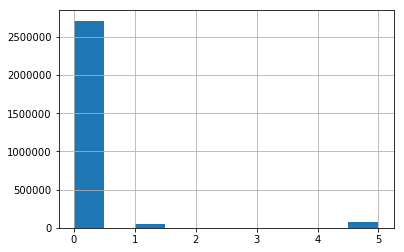

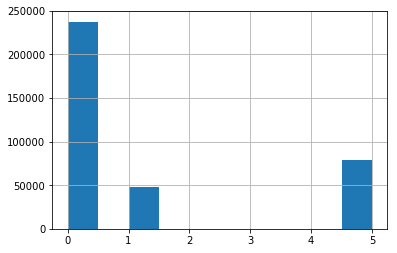

In [121]:
from sklearn.utils import resample
downsampling_rate=3
train_data['relevance'].hist()

balance_flag=True
plt.show()
def balance_dataset(train, downsampling_rate):
    
    # Separate majority and minority classes
    df_majority = train[train.relevance==0]
    df_minority = train[train.relevance==5]
    df_minority2 = train[train.relevance==1]

    # Downsample majority class
    df_majority_downsampled = resample(df_majority, 
                                     replace=False,    # sample without replacement
                                     n_samples=df_minority.shape[0]*downsampling_rate,     # to match minority class
                                     random_state=123) # reproducible results


    # Combine minority class with downsampled majority class
    df_downsampled = pd.concat([df_majority_downsampled, df_minority, df_minority2])

    # Display new class counts
    df_downsampled.relevance.value_counts()

    df_downsampled['relevance'].hist()
    #df_downsampled['relevance'].value_counts()
    train = df_downsampled
    train = train.sort_values('srch_id')
    return train

if balance_flag:
    train_data = balance_dataset(train_data,downsampling_rate)



## Training the model

In [122]:
# select features and target variable
features = train_data[selected_features].values
target = train_data["relevance"].values
n_estimators = 500
# train randomforest classifier on training data
classifier = RandomForestClassifier(n_estimators=n_estimators, 
                                    verbose=2,
                                    n_jobs=1,
                                    min_samples_split=10,
                                    random_state=1)
classifier.fit(features, target)

building tree 1 of 500


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500


building tree 334 of 500
building tree 335 of 500
building tree 336 of 500
building tree 337 of 500
building tree 338 of 500
building tree 339 of 500
building tree 340 of 500
building tree 341 of 500
building tree 342 of 500
building tree 343 of 500
building tree 344 of 500
building tree 345 of 500
building tree 346 of 500
building tree 347 of 500
building tree 348 of 500
building tree 349 of 500
building tree 350 of 500
building tree 351 of 500
building tree 352 of 500
building tree 353 of 500
building tree 354 of 500
building tree 355 of 500
building tree 356 of 500
building tree 357 of 500
building tree 358 of 500
building tree 359 of 500
building tree 360 of 500
building tree 361 of 500
building tree 362 of 500
building tree 363 of 500
building tree 364 of 500
building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 12.0min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=1, verbose=2, warm_start=False)

## Predict test set

In [123]:
def write_submission(recommendations, submission_file):
    """
    Function which writes submission, ordered on the probability obtained by the model.
    The columns are SearchId, PropertyId and Relevance    
    """
    submission_path = submission_file
    rows = [(srch_id, prop_id, relevance)
        for srch_id, prop_id, relevance, rank_float
        in sorted(recommendations, key=itemgetter(0,3))]
    writer = csv.writer(open(submission_path, "w"), lineterminator="\n")
    writer.writerow(("SearchId", "PropertyId", "Relevance"))
    writer.writerows(rows)

In [124]:
# test model with features of test dataset
features = test_data[selected_features].values

# make predictions with trained model
predictions = classifier.predict_proba(features)[:,1]


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  3.7min finished


## Use ndcg_calc  from the python expedia tools

In [125]:
test_data['booking_bool'] = test_data['relevance'].map({0:0, 5:1, 1:0})
test_data['click_bool'] = test_data['relevance'].map({0:0, 5:1, 1:1})
ndcg_calc(test_data, predictions)

/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/efiathieniti/PycharmProjects/DM2018/Assignment2/kaggle_expedia_tools.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

0.40273483247441205

## Use old ndcg with relevance^2 update

In [126]:

predictions_to_score = list(-1.0*predictions)
recommendations = list(zip(test_data["srch_id"], test_data["prop_id"], test_data['relevance'], predictions_to_score))

# write predictions to csv file
write_submission(recommendations, "results.csv")

In [127]:
# compute nDCG for results of test set
path_results = "results.csv"
ndcg_result = nDCG.compute_ndcg(path_results)
print(ndcg_result)

0.42161907129295867


In [128]:
learning_rate = 0

In [129]:

with open('result_statistics_benchmarking_code.txt', mode='a+') as f:
    f.write('%s\t%s\t%s\t%.2f\t%.2f\t%.2f\t%.2f\t%.2f\t%.5f\t%s\n'%(rand_seed, len(selected_features), n_estimators, 
            len(df_select)/100000,len(train_data)/100000, len(test_data)/100000,
            learning_rate,downsampling_rate, ndcg_result, balance_flag)) 
    

## Compare with random results

In [19]:
# write file with random results
# np.random.seed(1)
ordinals = np.arange(len(test_data))
np.random.shuffle(ordinals)
recommendations = zip(test_data["srch_id"], test_data["prop_id"], test_data['relevance'], ordinals)
write_submission(recommendations, "randomBenchmark.csv")

In [20]:
# compute nDCG 
path_results = "Bench_Results/randomBenchmark.csv"
print(nDCG.compute_ndcg(path_results))

FileNotFoundError: File b'Bench_Results/randomBenchmark.csv' does not exist

## Compare with perfect results

In [20]:
# write file with perfect results
ordinals = np.arange(len(test_data))
predictions = np.array(test_data['relevance'])
predictions = list(-1*predictions)
recommendations = zip(test_data["srch_id"], test_data["prop_id"], test_data['relevance'], predictions)
write_submission(recommendations, "testOrderBenchmark.csv")

In [21]:
# compute nDCG 
path_results = "Bench_Results/testOrderBenchmark.csv"
print(nDCG.compute_ndcg(path_results))

FileNotFoundError: File b'Bench_Results/testOrderBenchmark.csv' does not exist